In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import Dropdown, Output, VBox
from IPython.display import display

In [4]:
standing_path = '../step_0/standings/standing_2024.json'
with open(standing_path, 'r', encoding='utf-8') as f:
    standing_data = json.load(f)

team_path = '../step_0/teams/team_2024.json'
with open(team_path, 'r', encoding='utf-8') as f:
    team_data = json.load(f)

scorer_path = '../step_0/scorers/scorer_2024.json'
with open(scorer_path, 'r', encoding='utf-8') as f:
    scorer_data = json.load(f)

match_path = '../step_0/matches/match_2024.json'
with open(match_path, 'r', encoding='utf-8') as f:
    match_data = json.load(f)

In [5]:
total_standings = standing_data['standings'][0]['table']
home_standings = standing_data['standings'][1]['table']
away_standings = standing_data['standings'][2]['table']

total_df = pd.json_normalize(total_standings)
home_df = pd.json_normalize(home_standings)
away_df = pd.json_normalize(away_standings)

merged_df = total_df.merge(home_df, on='team.id', suffixes=('', '_home')).merge(away_df, on='team.id', suffixes=('', '_away'))

final_standing_df = merged_df[[
    'team.shortName', 'position', 'playedGames', 'form', 'won', 'draw', 'lost', 'points', 'goalsFor', 'goalsAgainst', 'goalDifference',
    'won_home', 'draw_home', 'lost_home', 'points_home', 'goalsFor_home', 'goalsAgainst_home',
    'won_away', 'draw_away', 'lost_away', 'points_away', 'goalsFor_away', 'goalsAgainst_away'
]]

final_standing_df.columns = [
    'Team', 'Pos', 'GP', 'Form', 'Won', 'Draw', 'Lost', 'Total Points', 'GF', 'GA', 'GD', 'H-Won', 'H-Draw', 'H-Lost', 'H-Point', 'H-GF', 'H-GA', 
    'A-Won', 'A-Draw', 'A-Lost', 'A-Point', 'A-GF', 'A-GA'
]

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

final_standing_df


,Team,Pos,GP,Form,Won,Draw,Lost,Total Points,GF,GA,GD,H-Won,H-Draw,H-Lost,H-Point,H-GF,H-GA,A-Won,A-Draw,A-Lost,A-Point,A-GF,A-GA
0,Liverpool,1,7,"W,W,W,L,W",6,0,1,18,13,2,11,2,0,1,6,5,1,4,0,0,12,8,1
1,Man City,2,7,"W,D,D,W,W",5,2,0,17,17,8,9,3,1,0,10,11,6,2,1,0,7,6,2
2,Arsenal,3,7,"W,W,D,W,D",5,2,0,17,15,6,9,3,1,0,10,10,4,2,1,0,7,5,2
3,Chelsea,4,7,"D,W,W,W,D",4,2,1,14,16,8,8,1,2,1,5,6,6,3,0,0,9,10,2
4,Aston Villa,5,7,"D,D,W,W,W",4,2,1,14,12,9,3,2,1,1,7,6,5,2,1,0,7,6,4
5,Brighton Hove,6,7,"W,L,D,D,D",3,3,1,12,13,10,3,2,2,0,8,7,5,1,1,1,4,6,5
6,Newcastle,7,7,"D,D,L,W,W",3,3,1,12,8,7,1,2,1,0,7,4,2,1,2,1,5,4,5
7,Fulham,8,7,"L,W,W,D,D",3,2,2,11,10,8,2,2,1,0,7,6,3,1,1,2,4,4,5
8,Tottenham,9,7,"L,W,W,L,L",3,1,3,10,14,8,6,2,0,1,6,7,2,1,1,2,4,7,6
9,Nottingham,10,7,"D,L,D,W,D",2,4,1,10,7,6,1,0,2,1,2,2,3,2,2,0,8,5,3


In [29]:
scorers_list = []
for scorer in scorer_data['scorers']:
    player = scorer['player']
    team = scorer['team']
    
    scorer_info = {
        'Player': f"{player['firstName']} {player['lastName']}",
        'Team': team['name'],
        'Goals': scorer['goals'],
        'Matches Played': scorer['playedMatches'],
        'Penalties': scorer['penalties'],
        'Nationality': player['nationality'],
        'Position': player['section'],
        'Last Updated': player['lastUpdated']
    }
    scorers_list.append(scorer_info)

scorer_df = pd.DataFrame(scorers_list)

scorer_df['Last Updated'] = pd.to_datetime(scorer_df['Last Updated']).dt.strftime('%B %d, %Y, %H:%M')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

scorer_df

,Player,Team,Goals,Matches Played,Penalties,Nationality,Position,Last Updated
0,Erling Haaland,Manchester City FC,10,7,1.0,Norway,Centre-Forward,"August 23, 2024, 09:25"
1,Bryan Mbeumo,Brentford FC,6,7,1.0,Cameroon,Right Winger,"August 23, 2024, 09:25"
2,Cole Palmer,Chelsea FC,6,7,1.0,England,Attacking Midfield,"August 23, 2024, 09:25"
3,Luis Díaz,Liverpool FC,5,7,NaN,Colombia,Left Winger,"August 23, 2024, 09:25"
4,Mo Salah,Liverpool FC,4,7,1.0,Egypt,Right Winger,"August 23, 2024, 09:25"
5,Kai Havertz,Arsenal FC,4,7,NaN,Germany,Attacking Midfield,"August 23, 2024, 09:25"
6,Danny Welbeck,Brighton & Hove Albion FC,4,7,NaN,England,Centre-Forward,"August 23, 2024, 09:25"
7,Chris Wood,Nottingham Forest FC,4,7,1.0,New Zealand,Centre-Forward,"August 23, 2024, 09:25"
8,Jhon Durán,Aston Villa FC,4,7,NaN,Colombia,Centre-Forward,"August 23, 2024, 09:25"
9,Nicolas Jackson,Chelsea FC,4,7,NaN,Senegal,Centre-Forward,"August 23, 2024, 09:25"


In [30]:
teams = team_data.get('teams', [])

team_info_list = []
    
for team in teams:
    team_info = {
        'Name': team['shortName'],
        'TLA': team['tla'],
        'Area': team['area']['code'],
        'Venue': team['venue'],
        'Coach': team['coach']['name'],
        'Squad': len(team['squad']),
        'Last Updated': team['lastUpdated']
    }
    team_info_list.append(team_info)

team_info_df = pd.DataFrame(team_info_list)

team_info_df['Last Updated'] = pd.to_datetime(team_info_df['Last Updated']).dt.strftime('%B %d, %Y, %H:%M')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

team_info_df

,Name,TLA,Area,Venue,Coach,Squad,Last Updated
0,Arsenal,ARS,ENG,Emirates Stadium,Mikel Arteta,35,"February 10, 2022, 19:48"
1,Aston Villa,AVL,ENG,Villa Park,Unai Emery,35,"April 03, 2022, 16:22"
2,Chelsea,CHE,ENG,Stamford Bridge,Enzo Maresca,35,"February 10, 2022, 19:24"
3,Everton,EVE,ENG,Goodison Park,Sean Dyche,30,"February 10, 2022, 19:47"
4,Fulham,FUL,ENG,Craven Cottage,Marco Silva,25,"July 29, 2024, 17:16"
5,Liverpool,LIV,ENG,Anfield,Arne Slot,25,"February 10, 2022, 19:30"
6,Man City,MCI,ENG,Etihad Stadium,Pep Guardiola,27,"February 10, 2022, 19:48"
7,Man United,MUN,ENG,Old Trafford,Erik ten Hag,29,"February 10, 2022, 19:27"
8,Newcastle,NEW,ENG,St. James' Park,Eddie Howe,30,"September 28, 2022, 18:51"
9,Tottenham,TOT,ENG,Tottenham Hotspur Stadium,Ange Postecoglou,31,"May 11, 2024, 21:39"


In [6]:
teams = team_data.get('teams', [])
team_names = [team['name'] for team in teams]
squads = {team['name']: team['squad'] for team in teams}

output = Output()

def update_squad(selected_team):
    with output:
        output.clear_output()
        squad = squads[selected_team]
        squad_df = pd.DataFrame(squad)
        display(squad_df[['name', 'position', 'dateOfBirth', 'nationality']])

team_dropdown = Dropdown(
    options=team_names,
    description='Team:',
    value=team_names[5]
)

team_dropdown.observe(lambda change: update_squad(change['new']), names='value')

display(team_dropdown, output)

update_squad(team_dropdown.value)

Dropdown(description='Team:', index=5, options=('Arsenal FC', 'Aston Villa FC', 'Chelsea FC', 'Everton FC', 'F…

Output()

In [7]:
output = Output()

def plot_all_teams(selected_metric):
    with output:
        output.clear_output()
        
        if selected_metric == 'Total':
            wins = final_standing_df['Won']
            draws = final_standing_df['Draw']
            losses = final_standing_df['Lost']
            metric_label = 'Total Performance'
        elif selected_metric == 'Home':
            wins = final_standing_df['H-Won']
            draws = final_standing_df['H-Draw']
            losses = final_standing_df['H-Lost']
            metric_label = 'Home Performance'
        elif selected_metric == 'Away':
            wins = final_standing_df['A-Won']
            draws = final_standing_df['A-Draw']
            losses = final_standing_df['A-Lost']
            metric_label = 'Away Performance'
        
        bar_width = 0.2
        x = range(len(final_standing_df['Team']))

        plt.figure(figsize=(12, 6))
        plt.bar(x, wins, width=bar_width, label='Wins', color='gold', align='center')
        plt.bar([i + bar_width for i in x], draws, width=bar_width, label='Draws', color='lightblue', align='center')
        plt.bar([i + 2 * bar_width for i in x], losses, width=bar_width, label='Losses', color='lightcoral', align='center')

        plt.xticks([i + bar_width for i in x], final_standing_df['Team'], rotation=45)
        plt.xlabel('Teams')
        plt.ylabel('Number of Matches')
        plt.title(f"{metric_label} of All Teams")
        plt.legend()
        plt.tight_layout()
        plt.show()

metric_dropdown = Dropdown(
    options=['Total', 'Home', 'Away'],
    value='Total',
    description='Select Metric:'
)

metric_dropdown.observe(lambda change: plot_all_teams(change['new']), names='value')

display(VBox([metric_dropdown]), output)

plot_all_teams(metric_dropdown.value)

Output()

In [8]:
output = Output()

def update_plot(selected_team, selected_metric):
    with output:
        output.clear_output()
        
        team_data = final_standing_df[final_standing_df['Team'] == selected_team].iloc[0]
        
        if selected_metric == 'Total':
            won, drawn, lost = team_data['Won'], team_data['Draw'], team_data['Lost']
        elif selected_metric == 'Home':
            won, drawn, lost = team_data['H-Won'], team_data['H-Draw'], team_data['H-Lost']
        elif selected_metric == 'Away':
            won, drawn, lost = team_data['A-Won'], team_data['A-Draw'], team_data['A-Lost']
        
        labels = ['Wins', 'Draws', 'Losses']
        sizes = [won, drawn, lost]
        colors = ['gold', 'lightblue', 'lightcoral']
        
        plt.figure(figsize=(7, 5))
        plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
        plt.title(f"{selected_metric} Performance of {selected_team}")
        plt.axis('equal')
        plt.show()

team_dropdown = Dropdown(
    options=final_standing_df['Team'].tolist(),
    value='Liverpool',
    description='Select Team:'
)

metric_dropdown = Dropdown(
    options=['Total', 'Home', 'Away'],
    value='Total',
    description='Select Metric:'
)

team_dropdown.observe(lambda change: update_plot(change['new'], metric_dropdown.value), names='value')
metric_dropdown.observe(lambda change: update_plot(team_dropdown.value, change['new']), names='value')

display(VBox([team_dropdown, metric_dropdown]), output)

Output()

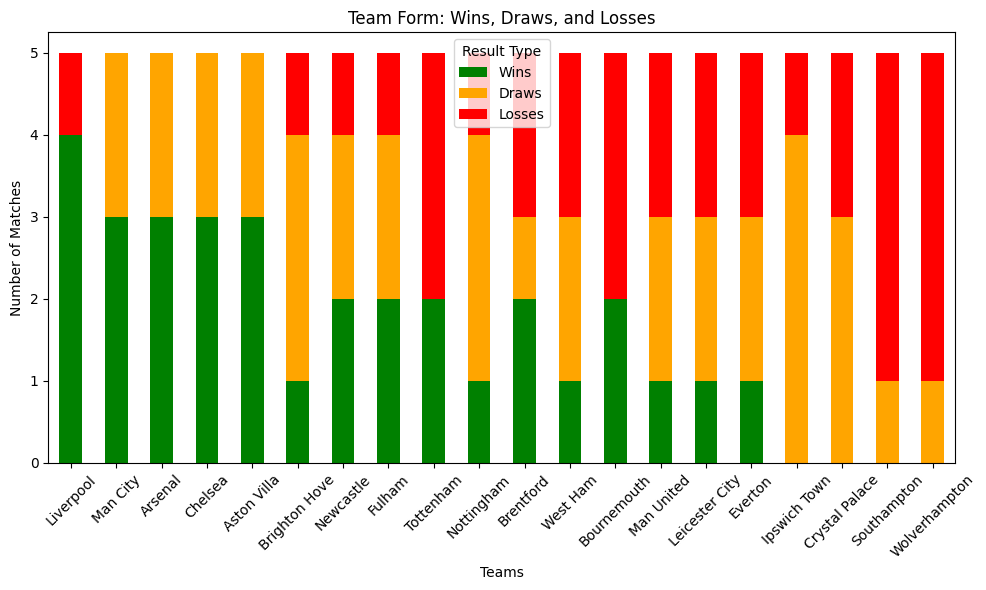

In [9]:
def calculate_form_stats(form):
    wins = form.count('W')
    draws = form.count('D')
    losses = form.count('L')
    return wins, draws, losses

form_stats = final_standing_df['Form'].apply(calculate_form_stats)
form_df = pd.DataFrame(form_stats.tolist(), columns=['Wins', 'Draws', 'Losses'])
form_df['Team'] = final_standing_df['Team']

form_df.set_index('Team', inplace=True)

form_df.plot(kind='bar', stacked=True, figsize=(10, 6), color=['green', 'orange', 'red'])
plt.title('Team Form: Wins, Draws, and Losses')
plt.xlabel('Teams')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.legend(title='Result Type')
plt.tight_layout()
plt.show()

In [10]:
output = Output()

def plot_goals_scored_vs_conceded():
    with output:
        output.clear_output()
        
        plt.figure(figsize=(10, 6))
        plt.scatter(final_standing_df['GA'], final_standing_df['GF'], color='blue', alpha=0.7)

        for i, team in enumerate(final_standing_df['Team']):
            plt.annotate(team, (final_standing_df['GA'].iloc[i], final_standing_df['GF'].iloc[i]), fontsize=9, ha='right')

        plt.title('Goals Scored vs Goals Conceded')
        plt.xlabel('Goals Conceded (GA)')
        plt.ylabel('Goals Scored (GF)')
        plt.grid(True)
        plt.tight_layout()
        plt.axhline(0, color='black',linewidth=0.5, ls='--')
        plt.axvline(0, color='black',linewidth=0.5, ls='--')
        plt.show()

plot_goals_scored_vs_conceded()

display(output)

Output()

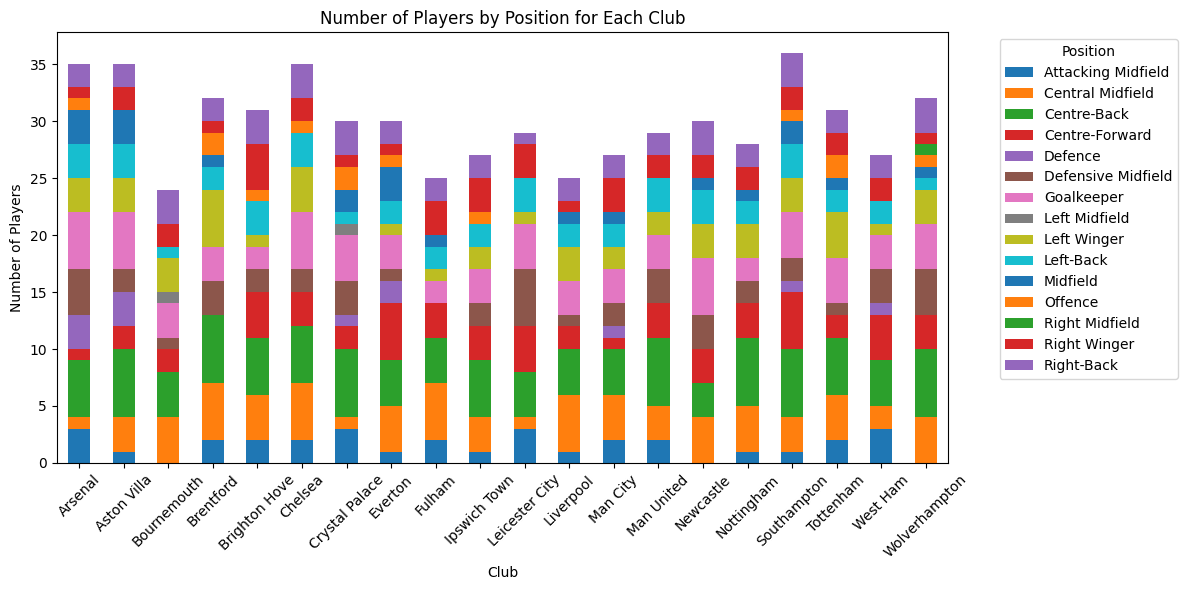

In [11]:
data = []

for team in team_data['teams']:
    team_name = team['shortName']
    for player in team['squad']:
        data.append({
            'Team': team_name,
            'Position': player['position']
        })

df = pd.DataFrame(data)

position_counts = df.groupby(['Team', 'Position']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
position_counts.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Number of Players by Position for Each Club')
plt.xlabel('Club')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

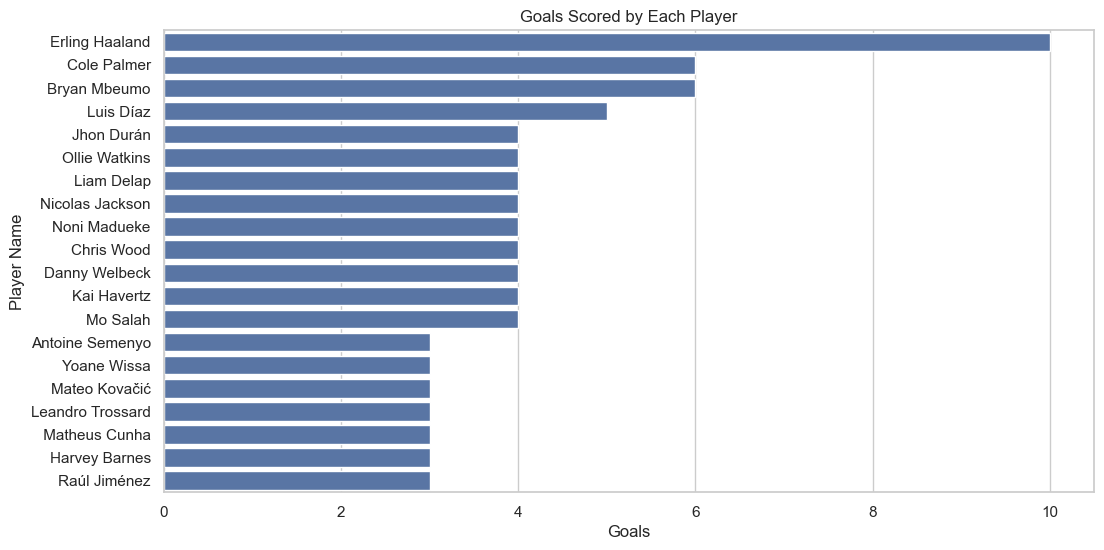

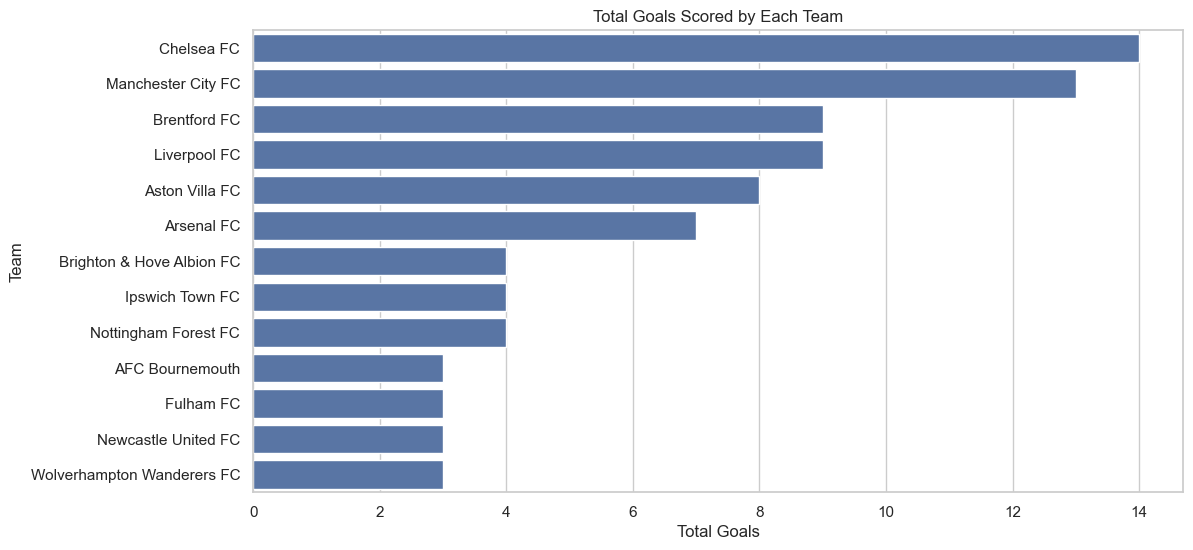

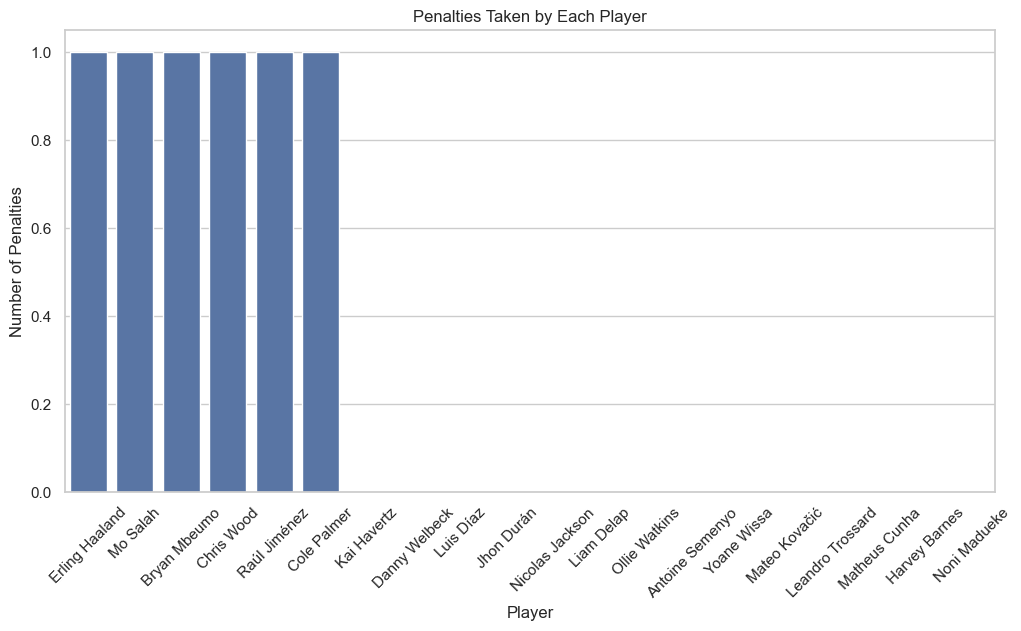

In [41]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x='Goals', y='Player', data=scorer_df.sort_values('Goals', ascending=False))
plt.title('Goals Scored by Each Player')
plt.xlabel('Goals')
plt.ylabel('Player Name')
plt.show()

team_goals = scorer_df.groupby('Team')['Goals'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Goals', y='Team', data=team_goals.sort_values('Goals', ascending=False))
plt.title('Total Goals Scored by Each Team')
plt.xlabel('Total Goals')
plt.ylabel('Team')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Player', y='Penalties', data=scorer_df.fillna(0).sort_values('Penalties', ascending=False))
plt.title('Penalties Taken by Each Player')
plt.xlabel('Player')
plt.ylabel('Number of Penalties')
plt.xticks(rotation=45)
plt.show()


## EPL 2024 - Matches

In [12]:
matches = match_data['matches']
matchdays = sorted(set(match['matchday'] for match in matches))

matches_by_matchday = {matchday: [] for matchday in matchdays}

for match in matches:
    matchday = match['matchday']
    match_info = {
        'Match ID': match['id'],
        'Home Team': match['homeTeam']['shortName'],
        'Away Team': match['awayTeam']['shortName'],
        'FT Home Score': match['score']['fullTime']['home'],
        'FT Away Score': match['score']['fullTime']['away'],
        'HT Home Score': match['score']['halfTime']['home'],
        'HT Away Score': match['score']['halfTime']['away'],
        'Winner': match['score']['winner'],
        'Status': match['status'],
        'Date': match['utcDate'],
        'Referee': match['referees'][0]['name'] if match['referees'] else 'N/A'
    }
    matches_by_matchday[matchday].append(match_info)

output = Output()

def update_matches(selected_matchday):
    with output:
        output.clear_output()
        match_list = matches_by_matchday[selected_matchday]
        match_df = pd.DataFrame(match_list)
        match_df['Date'] = pd.to_datetime(match_df['Date']).dt.strftime('%B %d, %Y, %H:%M')
        display(match_df)

matchday_dropdown = Dropdown(
    options=matchdays,
    description='Matchday:',
    value=matchdays[0]
)

matchday_dropdown.observe(lambda change: update_matches(change['new']), names='value')

display(matchday_dropdown, output)

update_matches(matchday_dropdown.value)

Dropdown(description='Matchday:', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, …

Output()

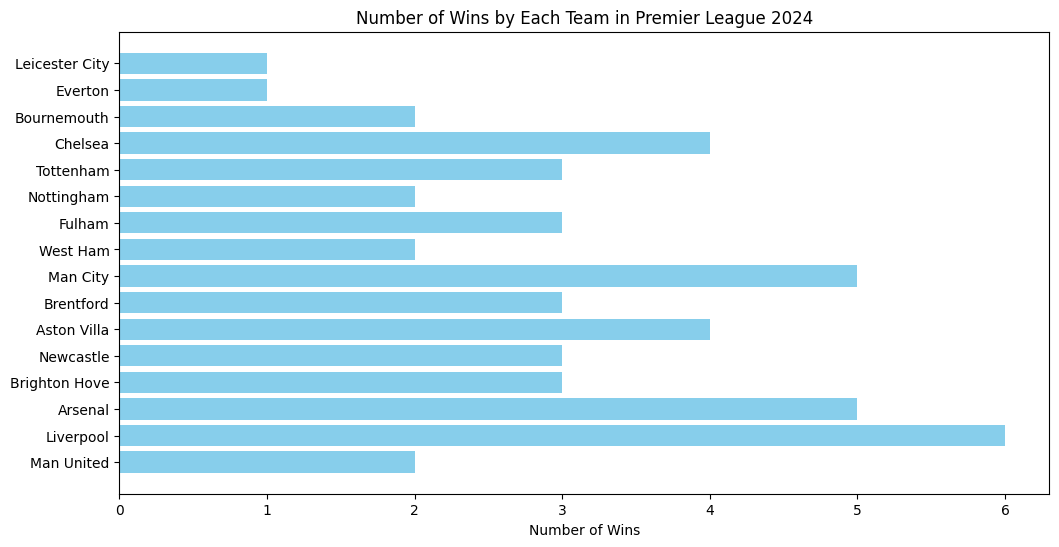

In [13]:
win_counts = {}

for matchday, matches in matches_by_matchday.items():
    for match in matches:
        winner = match['Winner']
        if winner == 'HOME_TEAM':
            home_team = match['Home Team']
            win_counts[home_team] = win_counts.get(home_team, 0) + 1
        elif winner == 'AWAY_TEAM':
            away_team = match['Away Team']
            win_counts[away_team] = win_counts.get(away_team, 0) + 1

teams = list(win_counts.keys())
wins = list(win_counts.values())

plt.figure(figsize=(12, 6))
plt.barh(teams, wins, color='skyblue')
plt.xlabel('Number of Wins')
plt.title('Number of Wins by Each Team in Premier League 2024')
plt.show()


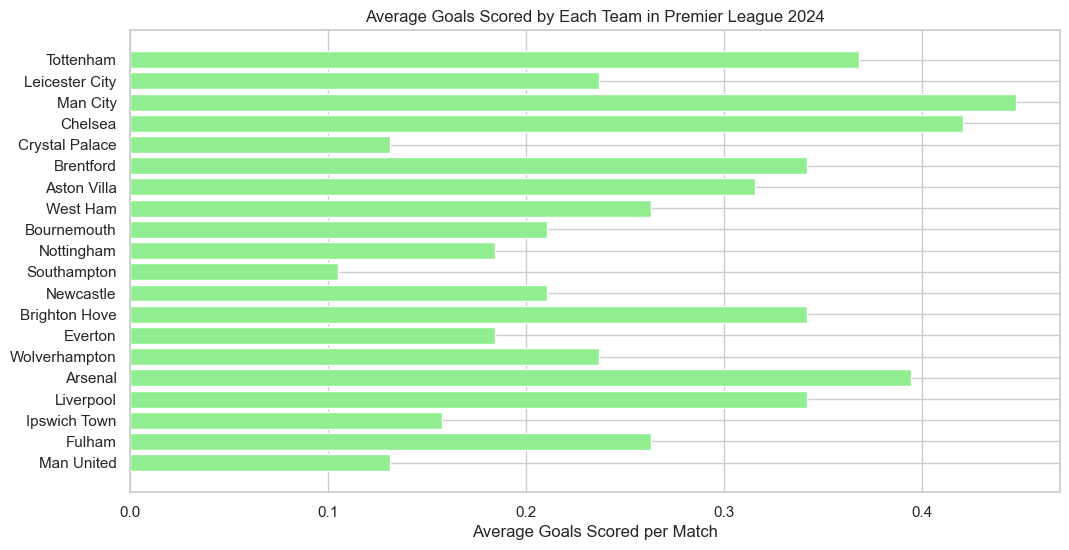

In [53]:
goals_scored = {}

for matchday, matches in matches_by_matchday.items():
    for match in matches:
        home_team = match['Home Team']
        away_team = match['Away Team']
        
        ft_home_score = match['FT Home Score'] if match['FT Home Score'] is not None else 0
        ft_away_score = match['FT Away Score'] if match['FT Away Score'] is not None else 0

        goals_scored[home_team] = goals_scored.get(home_team, 0) + ft_home_score
        goals_scored[away_team] = goals_scored.get(away_team, 0) + ft_away_score

matches_played = {team: 0 for team in goals_scored.keys()}
for matchday, matches in matches_by_matchday.items():
    for match in matches:
        matches_played[match['Home Team']] += 1
        matches_played[match['Away Team']] += 1

average_goals = {team: goals / matches_played[team] for team, goals in goals_scored.items()}

teams = list(average_goals.keys())
avg_goals = list(average_goals.values())

plt.figure(figsize=(12, 6))
plt.barh(teams, avg_goals, color='lightgreen')
plt.xlabel('Average Goals Scored per Match')
plt.title('Average Goals Scored by Each Team in Premier League 2024')
plt.show()


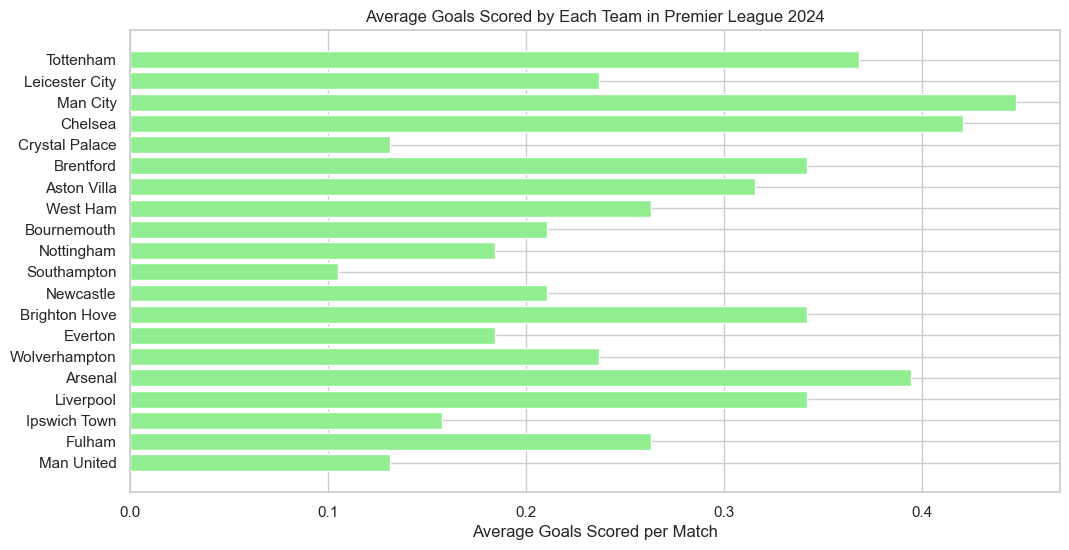

In [56]:
goals_scored = {}

for matchday, matches in matches_by_matchday.items():
    for match in matches:
        home_team = match['Home Team']
        away_team = match['Away Team']
        
        ft_home_score = match['FT Home Score'] if match['FT Home Score'] is not None else 0
        ft_away_score = match['FT Away Score'] if match['FT Away Score'] is not None else 0

        goals_scored[home_team] = goals_scored.get(home_team, 0) + ft_home_score
        goals_scored[away_team] = goals_scored.get(away_team, 0) + ft_away_score

matches_played = {team: 0 for team in goals_scored.keys()}
for matchday, matches in matches_by_matchday.items():
    for match in matches:
        matches_played[match['Home Team']] += 1
        matches_played[match['Away Team']] += 1

average_goals = {team: goals / matches_played[team] for team, goals in goals_scored.items()}

teams = list(average_goals.keys())
avg_goals = list(average_goals.values())

plt.figure(figsize=(12, 6))
plt.barh(teams, avg_goals, color='lightgreen')
plt.xlabel('Average Goals Scored per Match')
plt.title('Average Goals Scored by Each Team in Premier League 2024')
plt.show()


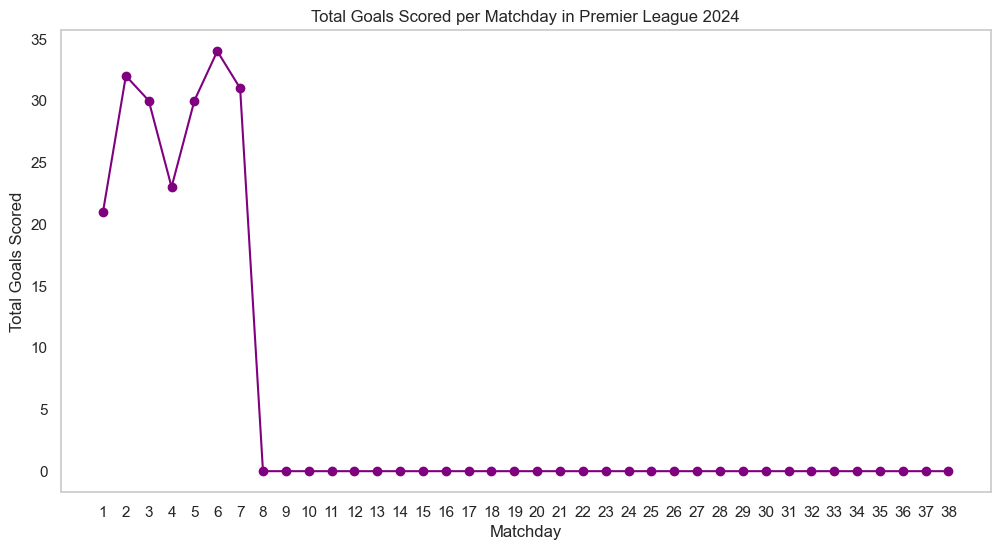

In [57]:
goals_per_matchday = {matchday: 0 for matchday in matchdays}

for matchday, matches in matches_by_matchday.items():
    for match in matches:
        ft_home_score = match['FT Home Score'] if match['FT Home Score'] is not None else 0
        ft_away_score = match['FT Away Score'] if match['FT Away Score'] is not None else 0
        
        goals_per_matchday[matchday] += ft_home_score + ft_away_score

matchdays = list(goals_per_matchday.keys())
total_goals = list(goals_per_matchday.values())

plt.figure(figsize=(12, 6))
plt.plot(matchdays, total_goals, marker='o', color='purple')
plt.xlabel('Matchday')
plt.ylabel('Total Goals Scored')
plt.title('Total Goals Scored per Matchday in Premier League 2024')
plt.xticks(matchdays)
plt.grid()
plt.show()
